# Covid Analysis(Regression)

Table of Contents
1.  Data Preprocessing
2.  Data Visualization
3.  EDA
4.  Splitting & Sending data to model
5.  Using Ensemble techniques
6.  Using GridsearchCV
7.  Best Model
8.  Cross Validation
9.  Saving the Model

# Data Preprocessing

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv("covid19.csv")
df


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [127]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [128]:
df.shape

(58, 18)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [130]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [131]:
df['Recovered'].fillna(int(df['Recovered'].mean()), inplace=True)

In [132]:
df['Incident_Rate'].fillna(int(df['Incident_Rate'].mean()), inplace=True)

In [133]:
df['People_Tested'].fillna(int(df['People_Tested'].mean()), inplace=True)

In [134]:
df['People_Hospitalized'].fillna(int(df['People_Hospitalized'].mean()), inplace=True)

In [135]:
df['Testing_Rate'].fillna(int(df['Testing_Rate'].mean()), inplace=True)

In [136]:
df['Hospitalization_Rate'].fillna(int(df['Hospitalization_Rate'].mean()), inplace=True)

In [137]:
df['Mortality_Rate'].fillna(int(df['Mortality_Rate'].mean()), inplace=True)

In [138]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [139]:
df.drop('Lat',axis=1,inplace=True)
df.drop('Long_',axis=1,inplace=True)
df.drop('Last_Update',axis=1,inplace=True)
df.drop('Province_State',axis=1,inplace=True)
df.drop('Country_Region',axis=1,inplace=True)
df.drop('UID',axis=1,inplace=True)
df.drop('ISO3',axis=1,inplace=True)
df.drop('FIPS',axis=1,inplace=True)
#We can drop Latitude, Longitude and Last Update because it has low relevance

In [140]:
df.shape

(58, 10)

# Data Visualization

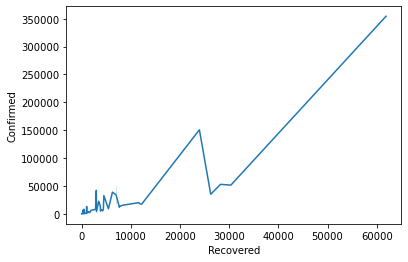

In [141]:
sns.lineplot(x=df["Recovered"],y=df["Confirmed"],data=df)
plt.show()

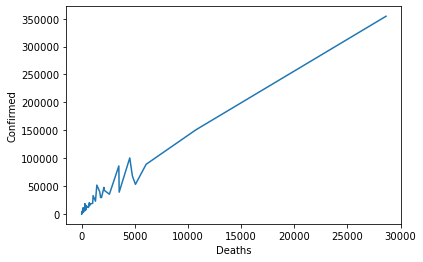

In [142]:
sns.lineplot(x=df["Deaths"],y=df["Confirmed"],data=df)
plt.show()

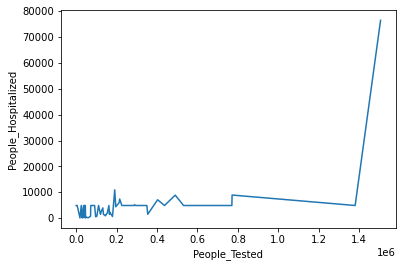

In [143]:
sns.lineplot(x=df["People_Tested"],y=df["People_Hospitalized"],data=df)
plt.show()

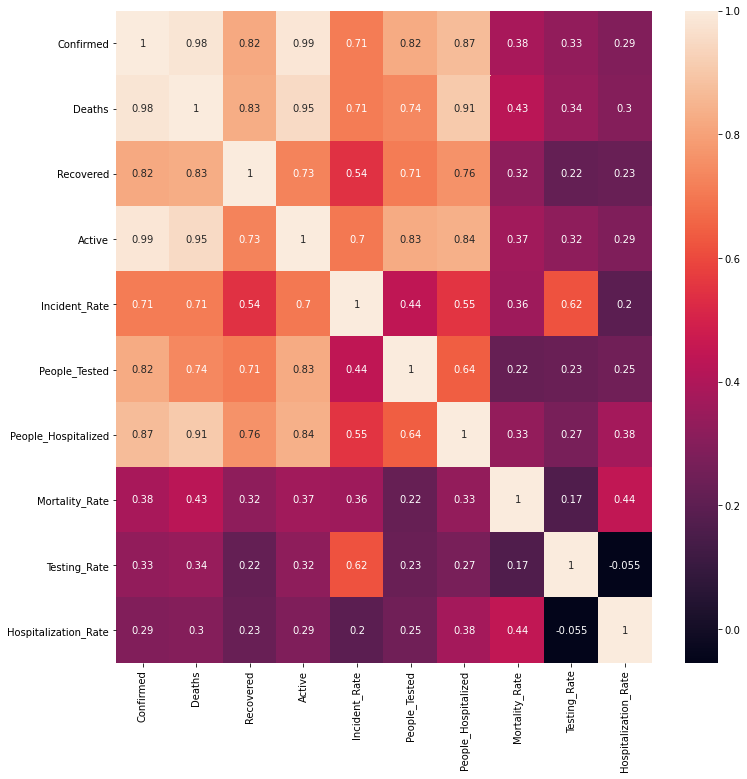

In [144]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Confirmed             58 non-null     int64  
 1   Deaths                58 non-null     int64  
 2   Recovered             58 non-null     float64
 3   Active                58 non-null     float64
 4   Incident_Rate         58 non-null     float64
 5   People_Tested         58 non-null     float64
 6   People_Hospitalized   58 non-null     float64
 7   Mortality_Rate        58 non-null     float64
 8   Testing_Rate          58 non-null     float64
 9   Hospitalization_Rate  58 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 4.7 KB


# EDA

Confirmed                  AxesSubplot(0.125,0.772143;0.110714x0.107857)
Deaths                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Recovered               AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Active                  AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Incident_Rate           AxesSubplot(0.656429,0.772143;0.110714x0.107857)
People_Tested           AxesSubplot(0.789286,0.772143;0.110714x0.107857)
People_Hospitalized        AxesSubplot(0.125,0.642714;0.110714x0.107857)
Mortality_Rate          AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Testing_Rate            AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Hospitalization_Rate    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
dtype: object

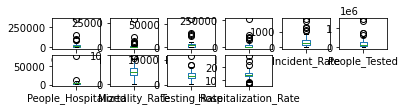

In [146]:
#checking Outliers
df.plot.box(subplots=True,layout=(6,6))

In [147]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(58, 10)
(53, 10)


In [148]:
df.skew()

Confirmed               2.054444
Deaths                  2.371053
Recovered               2.444600
Active                  2.625579
Incident_Rate           1.702220
People_Tested           1.789453
People_Hospitalized     0.081780
Mortality_Rate          0.540345
Testing_Rate            0.594055
Hospitalization_Rate    0.269323
dtype: float64

In [149]:
#lets treat the skewness in the input dataset
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    

In [150]:
df.skew()

Confirmed               0.236701
Deaths                  0.597743
Recovered               0.151188
Active                  0.563977
Incident_Rate          -0.279388
People_Tested          -0.033457
People_Hospitalized     0.081780
Mortality_Rate         -2.020602
Testing_Rate           -1.586269
Hospitalization_Rate    0.269323
dtype: float64

# Splitiing and sendind data to model

In [151]:
df1=df.drop(columns=['Deaths'])
x=df1
y=df['Deaths']

In [152]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 86 is 0.9837453557878172


In [154]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=86)

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')


Score of  LinearRegression()  is 0.9709090915388833
Error:
Mean Absolute Error: 0.3948992667970069
Mean Squared Error: 0.2501144059083906
Root Mean Squared Error: 0.5001143928226728
R2 Score: 0.9837453557878172
**************************************************************************************************


Score of  Lasso()  is 0.8966457385346291
Error:
Mean Absolute Error: 0.686645983199735
Mean Squared Error: 0.8085945946702182
Root Mean Squared Error: 0.8992188802901205
R2 Score: 0.9474503781558565
**************************************************************************************************


Score of  Ridge()  is 0.9694950497552629
Error:
Mean Absolute Error: 0.3703404894414383
Mean Squared Error: 0.23200038328130718
Root Mean Squared Error: 0.4816641810237784
R2 Score: 0.9849225650412599
**************************************************************************************************


Score of  ElasticNet()  is 0.899708783574803
Error:
Mean Absolute Error: 0.63444869074

# Using ensemble technique to boost accuracy score

In [163]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predrfr))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,predrfr)))
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
    

R2 Score is:  0.9216775569321797
RSME is:  1.0978012784423905
Mean Absolute Error: 0.9700986055673685
Mean Squared Error: 1.205167646949747


In [164]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print("R2 Score is: ",r2_score(y_test,predgbr))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,predgbr)))
print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
    

R2 Score is:  0.9411206459392233
RSME is:  0.9518360247580518
Mean Absolute Error: 0.8112365383113933
Mean Squared Error: 0.9059918180272107


# Using gridsearchCV

In [158]:
# best parameters for ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(37,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 37}

# Best Model

In [159]:
# using Ridge with best results
ridge=Ridge(alpha=1,random_state=37)
ridge.fit(x_train,y_train)
print("Score is ",ridge.score(x_train,y_train))
predridge=ridge.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predridge))
print("Mean Squared Error:",mean_squared_error(y_test,predridge))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predridge)))
print("R2 Score:",r2_score(y_test,predridge))

Score is  0.9697100346051191


Mean Absolute Error: 0.5199872131821451
Mean Squared Error: 0.4600707367166221
Root Mean Squared Error: 0.6782851441072715
R2 Score: 0.9718924542246752


# Cross Validation

In [160]:
# cross validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(ridge,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.84990757 0.94495252 0.93048744 0.9693452  0.89482495]
0.9179035364967447 0.04169489100736395


# Saving the Model

In [161]:
# saving the best model 

import joblib
joblib.dump(ridge,'COVID19.obj')

['COVID19.obj']